In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
SAVE_MEMORY = True

In [3]:
data_dir = "../data/"

In [4]:
df_id = pd.read_csv(data_dir + "train_identity.csv")
df_trans = pd.read_csv(data_dir + "train_transaction.csv")

In [5]:
# join by TransactionID
df = pd.merge(df_id, df_trans, on=['TransactionID'], how='outer')

In [6]:
# The data is broken into two files identity and transaction, which are joined by TransactionID

In [7]:
# identity

In [8]:
print(df_id.shape)

(144233, 41)


In [9]:
print(df_id.dtypes)

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_id[0:100])

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0         2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1         2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2         2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3         2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4         2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   
5         2987017   -5.0   61141.0    3.0    0.0    3.0    0.0    NaN    NaN   
6         2987022  -15.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7         2987038    0.0   31964.0    0.0    0.0    0.0  -10.0    NaN    NaN   
8         2987040  -10.0  116098.0    0.0    0.0    0.0    0.0    NaN    NaN   
9         2987048   -5.0  257037.0    NaN    NaN    0.0    0.0    NaN    NaN   
10        2987049   -5.0  287959.0    NaN    NaN    1.0  -11.0    NaN    NaN   
11        2987057    0.0   88525.0    NaN    NaN    NaN    NaN    NaN    NaN   
12        2987066   -5.0   54927.0    0.0    0.0    0.0   -1.0    NaN    NaN   
13        2987069    0.0   69542.0    0.0    0.0    2.0   -4.0    NaN    NaN   
14        2987070    0.0  132356.0    NaN    NaN    1.0   -6.0    NaN    NaN   
15        2987072    0.0  275611.0    NaN    NaN    0.0    0.0    NaN    NaN   
16        2987074   -5.0  419136.0    NaN    NaN    0.0    0.0    NaN    NaN   
17        2987084   -5.0  436352.0    NaN    NaN    0.0    0.0    NaN    NaN   
18        2987093   -5.0   34810.0    NaN    NaN    1.0    0.0    NaN    NaN   
19        2987099  -10.0  129080.0    0.0    0.0    9.0  -43.0   22.0  -34.0   
20        2987100    0.0  264818.0    NaN    NaN    0.0    0.0    NaN    NaN   
21        2987101    0.0   49557.0    0.0    0.0    0.0    0.0    NaN    NaN   
22        2987104    0.0   30696.0    0.0    0.0    0.0    0.0    NaN    NaN   
23        2987105    0.0  194580.0    NaN    NaN   12.0   -6.0    NaN    NaN   
24        2987108  -15.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25        2987111   -5.0  252899.0    NaN    NaN    0.0    0.0    NaN    NaN   
26        2987114   -5.0  190935.0    0.0    0.0    6.0   -9.0    NaN    NaN   
27        2987119    0.0   23923.0    0.0    0.0    0.0    0.0    NaN    NaN   
28        2987121    0.0   18305.0    2.0    0.0    2.0    0.0    NaN    NaN   
29        2987125    0.0   32876.0    2.0    0.0    2.0    0.0    NaN    NaN   
30        2987130  -10.0  175789.0    0.0    0.0    0.0    0.0    NaN    NaN   
31        2987138   -5.0   68343.0    0.0    0.0    1.0    0.0    NaN    NaN   
32        2987141   -5.0  110477.0    NaN    NaN    0.0   -5.0    NaN    NaN   
33        2987144   -5.0  157470.0    0.0    0.0    0.0   -5.0    NaN    NaN   
34        2987145   -5.0  127488.0    NaN    NaN    2.0  -11.0    NaN    NaN   
35        2987148   -5.0  123916.0    NaN    NaN    0.0    0.0    NaN    NaN   
36        2987156   -5.0   55836.0    NaN    NaN    0.0    0.0    NaN    NaN   
37        2987167    0.0  124221.0    NaN    NaN    0.0    0.0    NaN    NaN   
38        2987173    0.0  113499.0    NaN    NaN    0.0    0.0    NaN    NaN   
39        2987183    0.0   79656.0    NaN    NaN    0.0    0.0    NaN    NaN   
40        2987188   -5.0   15464.0    0.0    0.0    4.0  -44.0    6.0  -55.0   
41        2987189   -5.0  363527.0    NaN    NaN    0.0    0.0    NaN    NaN   
42        2987190  -20.0  157297.0    NaN    NaN    NaN    NaN    NaN    NaN   
43        2987192   -5.0  302597.0    NaN    NaN    0.0    0.0    NaN    NaN   
44        2987196   -5.0  211439.0    NaN    NaN    0.0    0.0    NaN    NaN   
45        2987197    0.0   77852.0    NaN    NaN    0.0    0.0    NaN    NaN   
46        2987198    0.0   49347.0    NaN    NaN    0.0    0.0    NaN    NaN   
47        2987199  -20.0  146516.0    NaN    NaN    0.0    0.0    NaN    NaN   
48        2987207   -5.0   84798.0    NaN    NaN    4.0    0.0    NaN    NaN   
49  

In [11]:
# transaction

In [12]:
print(df_trans.shape)

(590540, 394)


In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_trans.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_trans[0:100])

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0         2987000        0          86400          68.500         W  13926   
1         2987001        0          86401          29.000         W   2755   
2         2987002        0          86469          59.000         W   4663   
3         2987003        0          86499          50.000         W  18132   
4         2987004        0          86506          50.000         H   4497   
5         2987005        0          86510          49.000         W   5937   
6         2987006        0          86522         159.000         W  12308   
7         2987007        0          86529         422.500         W  12695   
8         2987008        0          86535          15.000         H   2803   
9         2987009        0          86536         117.000         W  17399   
10        2987010        0          86549          75.887         C  16496   
11        2987011        0          86555          16.495         C   4461   
12        2987012        0          86564          50.000         W   3786   
13        2987013        0          86585          40.000         W  12866   
14        2987014        0          86596          10.500         W  11839   
15        2987015        0          86618          57.950         W   7055   
16        2987016        0          86620          30.000         H   1790   
17        2987017        0          86668         100.000         H  11492   
18        2987018        0          86725          47.950         W   4663   
19        2987019        0          86730         186.000         W   7005   
20        2987020        0          86761          39.000         W   7875   
21        2987021        0          86769         159.950         W  11401   
22        2987022        0          86786          50.000         H   1724   
23        2987023        0          86808         107.950         W   2392   
24        2987024        0          86821          73.950         W  10112   
25        2987025        0          86944         107.950         W  15385   
26        2987026        0          86945         184.000         W  17868   
27        2987027        0          86972          47.950         W  11307   
28        2987028        0          86973          20.000         W   8431   
29        2987029        0          86979          36.990         W  12932   
30        2987030        0          86994          35.000         W  13276   
31        2987031        0          86998         363.890         W   6573   
32        2987032        0          87008         200.000         W   7835   
33        2987033        0          87078          40.000         W   8613   
34        2987034        0          87135         107.950         W  17359   
35        2987035        0          87140         107.950         W   9766   
36        2987036        0          87149          77.000         W   4806   
37        2987037        0          87161          21.950         W  13249   
38        2987038        0          87172          25.000         S   5463   
39        2987039        0          87202          39.950         W  12598   
40        2987040        0          87209          75.887         C  13329   
41        2987041        0          87220         774.000         W   9002   
42        2987042        0          87233         117.000         W  13085   
43        2987043        0          87248          49.000         W  10776   
44        2987044        0          87266          39.500         W   9281   
45        2987045        0          87275          36.950         W  16132   
46        2987046        0          87285          49.000         W  12544   
47        2987047        0          87285          15.000         W   4208   
48        2987048        0          87317          42.294         C  15885   
49        2987049        0          87317           3.595         C  12730   
50        2987050        0

In [15]:
if SAVE_MEMORY:
    del df_id
    del df_trans    

In [16]:
print(df.shape)

(590540, 434)


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

TransactionID       int64
id_01             float64
id_02             float64
id_03             float64
id_04             float64
id_05             float64
id_06             float64
id_07             float64
id_08             float64
id_09             float64
id_10             float64
id_11             float64
id_12              object
id_13             float64
id_14             float64
id_15              object
id_16              object
id_17             float64
id_18             float64
id_19             float64
id_20             float64
id_21             float64
id_22             float64
id_23              object
id_24             float64
id_25             float64
id_26             float64
id_27              object
id_28              object
id_29              object
id_30              object
id_31              object
id_32             float64
id_33              object
id_34              object
id_35              object
id_36              object
id_37              object
id_38       

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[0:100])

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0         2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1         2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2         2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3         2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4         2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   
5         2987017   -5.0   61141.0    3.0    0.0    3.0    0.0    NaN    NaN   
6         2987022  -15.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7         2987038    0.0   31964.0    0.0    0.0    0.0  -10.0    NaN    NaN   
8         2987040  -10.0  116098.0    0.0    0.0    0.0    0.0    NaN    NaN   
9         2987048   -5.0  257037.0    NaN    NaN    0.0    0.0    NaN    NaN   
10        2987049   -5.0  287959.0    NaN    NaN    1.0  -11.0    NaN    NaN   
11        2987057    0.0   88525.0    NaN    NaN    NaN    NaN    NaN    NaN   
12        2987066   -5.0   54927.0    0.0    0.0    0.0   -1.0    NaN    NaN   
13        2987069    0.0   69542.0    0.0    0.0    2.0   -4.0    NaN    NaN   
14        2987070    0.0  132356.0    NaN    NaN    1.0   -6.0    NaN    NaN   
15        2987072    0.0  275611.0    NaN    NaN    0.0    0.0    NaN    NaN   
16        2987074   -5.0  419136.0    NaN    NaN    0.0    0.0    NaN    NaN   
17        2987084   -5.0  436352.0    NaN    NaN    0.0    0.0    NaN    NaN   
18        2987093   -5.0   34810.0    NaN    NaN    1.0    0.0    NaN    NaN   
19        2987099  -10.0  129080.0    0.0    0.0    9.0  -43.0   22.0  -34.0   
20        2987100    0.0  264818.0    NaN    NaN    0.0    0.0    NaN    NaN   
21        2987101    0.0   49557.0    0.0    0.0    0.0    0.0    NaN    NaN   
22        2987104    0.0   30696.0    0.0    0.0    0.0    0.0    NaN    NaN   
23        2987105    0.0  194580.0    NaN    NaN   12.0   -6.0    NaN    NaN   
24        2987108  -15.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25        2987111   -5.0  252899.0    NaN    NaN    0.0    0.0    NaN    NaN   
26        2987114   -5.0  190935.0    0.0    0.0    6.0   -9.0    NaN    NaN   
27        2987119    0.0   23923.0    0.0    0.0    0.0    0.0    NaN    NaN   
28        2987121    0.0   18305.0    2.0    0.0    2.0    0.0    NaN    NaN   
29        2987125    0.0   32876.0    2.0    0.0    2.0    0.0    NaN    NaN   
30        2987130  -10.0  175789.0    0.0    0.0    0.0    0.0    NaN    NaN   
31        2987138   -5.0   68343.0    0.0    0.0    1.0    0.0    NaN    NaN   
32        2987141   -5.0  110477.0    NaN    NaN    0.0   -5.0    NaN    NaN   
33        2987144   -5.0  157470.0    0.0    0.0    0.0   -5.0    NaN    NaN   
34        2987145   -5.0  127488.0    NaN    NaN    2.0  -11.0    NaN    NaN   
35        2987148   -5.0  123916.0    NaN    NaN    0.0    0.0    NaN    NaN   
36        2987156   -5.0   55836.0    NaN    NaN    0.0    0.0    NaN    NaN   
37        2987167    0.0  124221.0    NaN    NaN    0.0    0.0    NaN    NaN   
38        2987173    0.0  113499.0    NaN    NaN    0.0    0.0    NaN    NaN   
39        2987183    0.0   79656.0    NaN    NaN    0.0    0.0    NaN    NaN   
40        2987188   -5.0   15464.0    0.0    0.0    4.0  -44.0    6.0  -55.0   
41        2987189   -5.0  363527.0    NaN    NaN    0.0    0.0    NaN    NaN   
42        2987190  -20.0  157297.0    NaN    NaN    NaN    NaN    NaN    NaN   
43        2987192   -5.0  302597.0    NaN    NaN    0.0    0.0    NaN    NaN   
44        2987196   -5.0  211439.0    NaN    NaN    0.0    0.0    NaN    NaN   
45        2987197    0.0   77852.0    NaN    NaN    0.0    0.0    NaN    NaN   
46        2987198    0.0   49347.0    NaN    NaN    0.0    0.0    NaN    NaN   
47        2987199  -20.0  146516.0    NaN    NaN    0.0    0.0    NaN    NaN   
48        2987207   -5.0   84798.0    NaN    NaN    4.0    0.0    NaN    NaN   
49  

In [19]:
# count missing values 

def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    #mz_table['mean'] = df.mean()
    #mz_table['std'] = df.std()
    
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mz_table.shape[0]) +
          " columns that have missing values.")
        #mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)    
    return mz_table

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(missing_zero_values_table(df))

Your selected dataframe has 434 columns and 590540 Rows.
There are 414 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
id_24                    0          585793               99.2   
id_25                    0          585408               99.1   
id_07                  409          585385               99.1   
id_08                  261          585385               99.1   
id_21                    0          585381               99.1   
id_26                    0          585377               99.1   
id_23                    0          585371               99.1   
id_22                    0          585371               99.1   
id_27                    0          585371               99.1   
dist2                 3519          552913               93.6   
D7                   21135          551623               93.4   
id_18                    0          545427               92.4   
D13                  48840          528588               89.5   
D14                  45266          528353               89.5   
D12                  42756          525823               89.0   
id_04                65739          524216               88.8   
id_03                63903          524216               88.8   
D6                   45782          517353               87.6   
id_33                    0          517251               87.6   
id_10                72879          515614               87.3   
D8                     835          515614               87.3   
id_09                70378          515614               87.3   
D9                    4190          515614               87.3   
id_30                    0          512975               86.9   
id_32                    6          512954               86.9   
id_34                    0          512735               86.8   
id_14                  192          510496               86.4   
V148                 21848          508595               86.1   
V157                 21848          508595               86.1   
V139                 21848          508595               86.1   
V140                 21825          508595               86.1   
V141                 79211          508595               86.1   
V142                 79152          508595               86.1   
V163                 79152          508595               86.1   
V162                 79008          508595               86.1   
V161                 79211          508595               86.1   
V147                 74531          508595               86.1   
V158                 21825          508595               86.1   
V138                 80610          508595               86.1   
V156                 21825          508595               86.1   
V154                 21825          508595               86.1   
V146                 74718          508595               86.1   
V153                 21848          508595               86.1   
V149                 21825          508595               86.1   
V155                 21848          508595               86.1   
V166                 62439          508589               86.1   
V150                     0          508589               86.1   
V145                 61241          508589               86.1   
V143                 63872          508589               86.1   
V151                     0          508589               86.1   
V165                 62598          508589               86.1   
V164                 63872          508589               86.1   
V144                 62439          508589               86.1   
V152                     0          508589               86.1   
V160                 63341          508589               86.1   
V159                 68397          508589               86.1   
V322                 65970          508189               86.1   
V323                 60806          508189               86.1   
V339                 72799          508189               86.1   
V324                 62945          508189               86.1   
V336                 75098          508189        

In [21]:
df_clean = df.loc[:, df.isnull().mean() < .8]

In [22]:
if SAVE_MEMORY:
    del df

In [23]:
for idx, column_name in enumerate(list(df_clean.columns.values)):    
    if df_clean[column_name].dtype == 'object':
        df_clean[column_name] = df_clean[column_name].astype('str')        
        df_clean[column_name] = LabelEncoder().fit_transform(df_clean[column_name])

In [24]:
# to save memory

df_stat = pd.DataFrame(columns=df_clean.columns)
std_list = []
mean_list = []

for idx, column_name in enumerate(list(df_clean.columns.values)):            
    std_list += [df_clean[column_name].std()]
    mean_list += [df_clean[column_name].mean()]

df_stat.loc["std"] = std_list
df_stat.loc["mean"] = mean_list

with pd.option_context('display.max_rows', None, 'display.max_columns', None):   
    display(df_stat)

TransactionID      id_01          id_02     id_05      id_06      id_11  \
std    1.704744e+05  14.347949  159651.816856  5.249856  16.491104   1.127602   
mean   3.282270e+06 -10.170502  174716.584708  1.615585  -6.698710  99.745325   

         id_12      id_13     id_15     id_16       id_17       id_19  \
std   0.522966  11.774858  1.068432  0.667962   30.375360  141.095343   
mean  1.719848  48.053071  2.427553  1.668669  189.451377  353.128174   

           id_20     id_28     id_29      id_31     id_35     id_36     id_37  \
std   152.160327  0.700504  0.696917  18.887231  0.663430  0.838376  0.556321   
mean  403.882666  1.632184  1.634396  95.211271  1.654289  1.534238  1.709557   

         id_38  DeviceType   DeviceInfo   isFraud  TransactionDT  \
std   0.694144    0.724336   241.672478  0.183755   4.617224e+06   
mean  1.636084    1.617342  1668.617692  0.034990   7.372311e+06   

      TransactionAmt  ProductCD        card1       card2       card3  \
std       239.162522   1.423926  4901.170153  157.793246   11.336444   
mean      135.027176   3.220757  9898.734658  362.555488  153.194925   

         card4       card5     card6       addr1      addr2       dist1  \
std   1.035866   41.244453  0.449543  101.741072   2.690623  371.872026   
mean  3.266305  199.278897  1.753033  290.733794  86.800630  118.502180   

      P_emaildomain  R_emaildomain          C1          C2        C3  \
std       16.521584       8.963983  133.569018  154.668899  0.150536   
mean      24.666763      28.986617   14.092458   15.269734  0.005644   

             C4         C5         C6         C7         C8         C9  \
std   68.848459  25.786976  71.508467  61.727304  95.378574  16.674897   
mean   4.092185   5.571526   9.071082   2.848478   5.144574   4.480240   

            C10        C11        C12         C13        C14          D1  \
std   95.581443  94.336292  86.666218  129.364844  49.544262  157.660387   
mean   5.240343  10.241521   4.076227   32.539918   8.295215   94.347568   

              D2         D3          D4         D5         D10         D11  \
std   177.315865  62.384721  191.096774  89.000144  182.615225  186.042622   
mean  169.563231  28.343348  140.002441  42.335965  123.982137  146.621465   

             D15        M1        M2        M3        M4        M5        M6  \
std   202.726660  0.498404  0.596122  0.674616  1.348733  0.825583  0.814138   
mean  163.744579  1.459029  1.401544  1.344415  1.721963  1.369138  0.900945   

            M7        M8        M9        V1        V2        V3        V4  \
std   0.944517  0.862913  0.616765  0.007390  0.240133  0.320890  0.440053   
mean  1.228420  1.323434  1.520913  0.999945  1.045204  1.078075  0.846456   

            V5        V6        V7        V8        V9       V10       V11  \
std   0.475902  0.239385  0.304779  0.186069  0.226339  0.521522  0.552431   
mean  0.876991  1.045686  1.072870  1.027704  1.041529  0.463915  0.478987   

           V12       V13       V14       V15       V16       V17       V18  \
std   0.510533  0.532185  0.022345  0.332422  0.342841  0.364456  0.371763   
mean  0.559711  0.599166  0.999500  0.122342  0.123460  0.134040  0.135363   

           V19       V20       V21       V22       V23       V24       V25  \
std   0.425512  0.459451  0.339060  0.359415  0.247681  0.305485  0.185245   
mean  0.816371  0.847843  0.129684  0.132292  1.034791  1.058097  0.977660   

           V26       V27       V28       V29       V30       V31       V32  \
std   0.209302  0.028596  0.031133  0.510652  0.554311  0.355793  0.368278   
mean  0.988040  0.000776  0.000830  0.387840  0.406436  0.140761  0.142417   

           V33       V34       V35       V36       V37      V38       V39  \
std   0.340900  0.357549  0.516010  0.539039  0.690571  0.85892  0.451956   
mean  0.130693  0.139154  0.542594  0.579198  1.108065  1.16240  0.166076   

           V40       V41       V42       V43       V44       V45       V46  \
std   0.505786  0.02

In [25]:
print(df_clean.shape)

(590540, 360)


[                    ] 0%

/home/jaqq/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[=                   ] 5%

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[=                   ] 9%

/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


[=================== ] 99%

<Figure size 432x288 with 0 Axes>

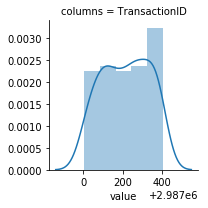

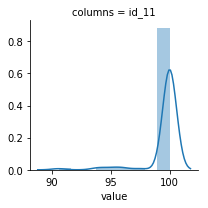

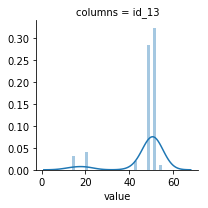

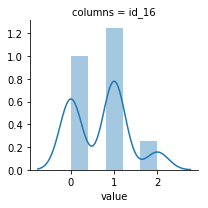

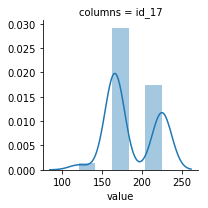

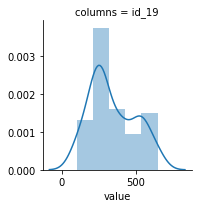

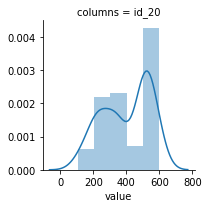

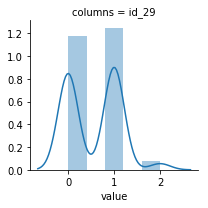

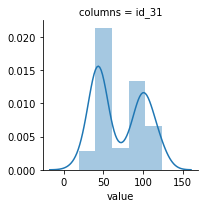

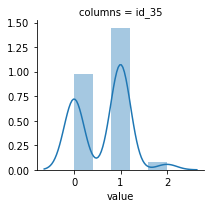

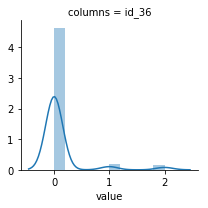

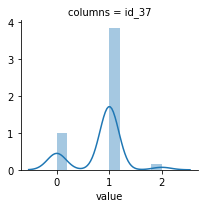

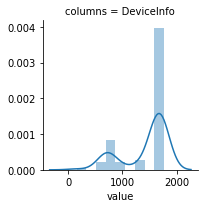

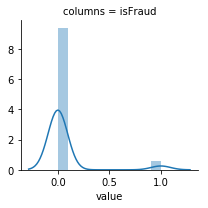

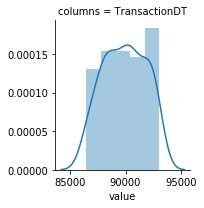

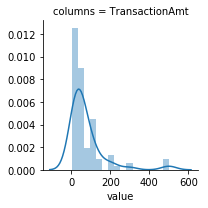

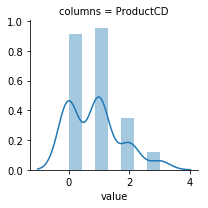

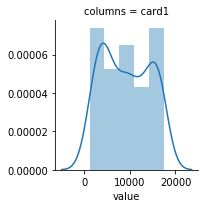

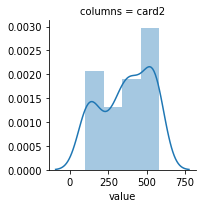

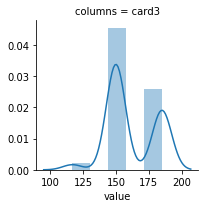

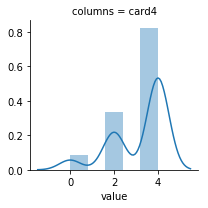

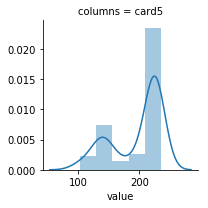

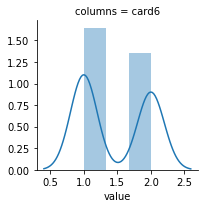

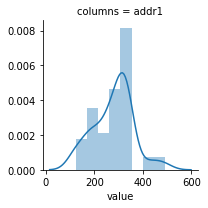

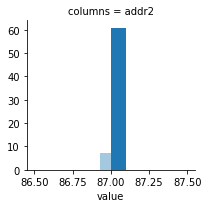

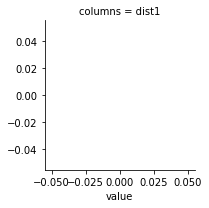

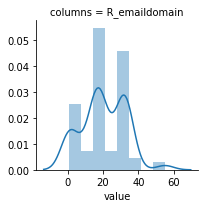

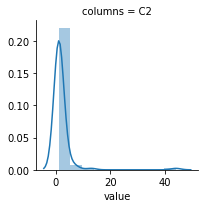

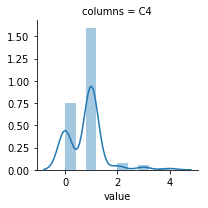

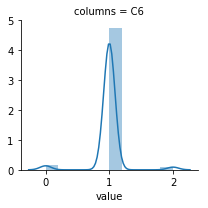

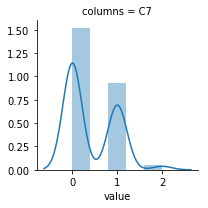

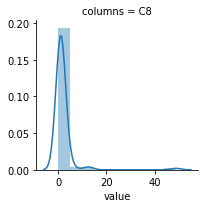

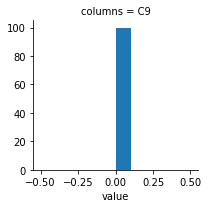

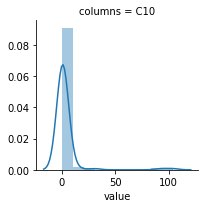

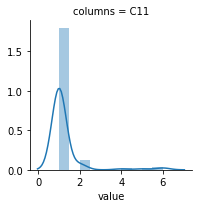

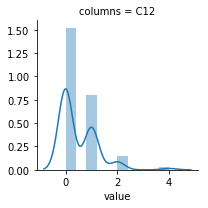

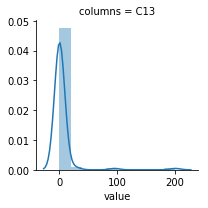

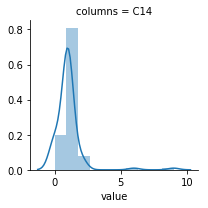

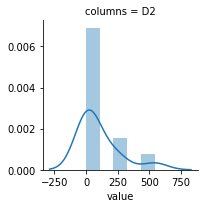

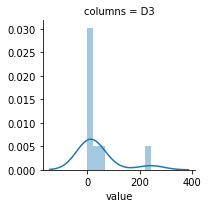

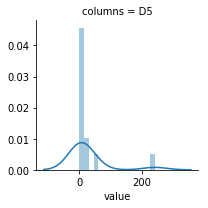

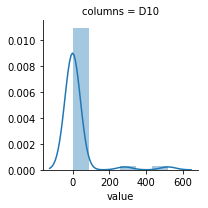

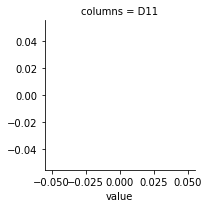

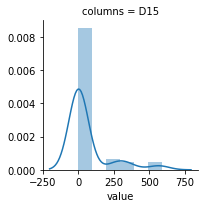

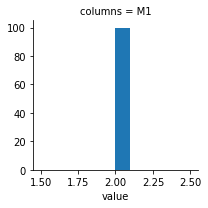

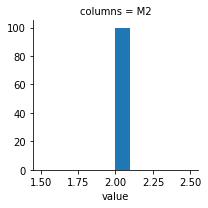

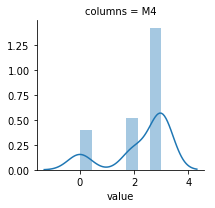

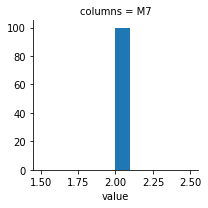

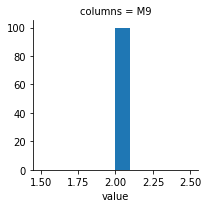

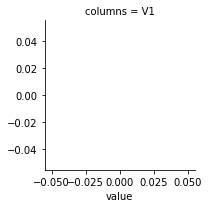

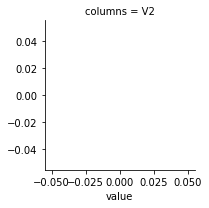

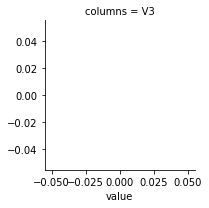

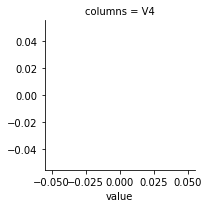

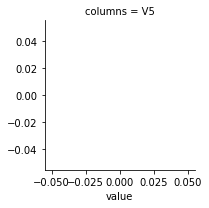

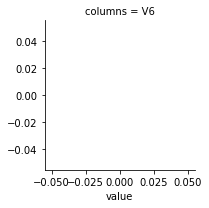

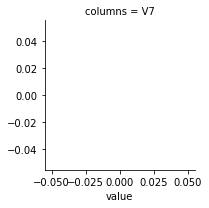

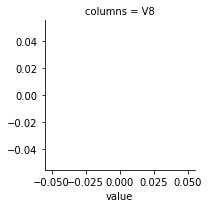

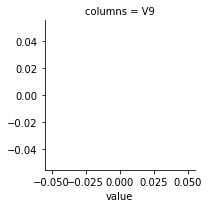

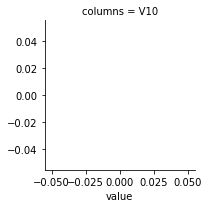

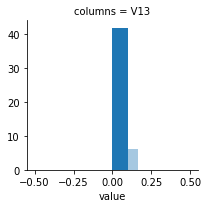

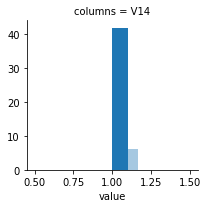

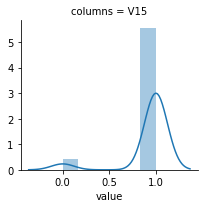

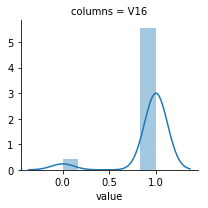

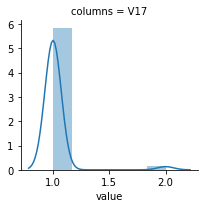

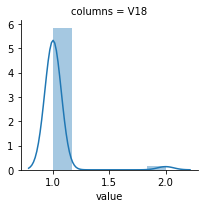

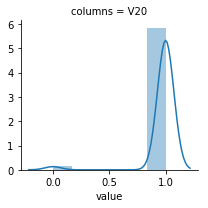

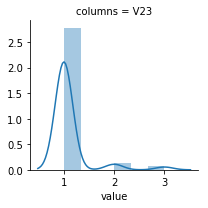

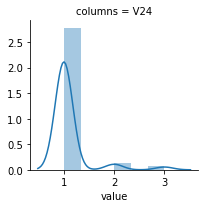

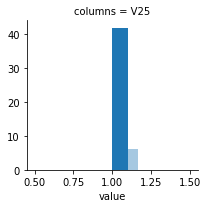

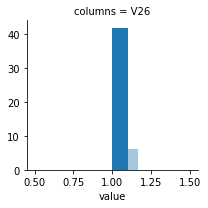

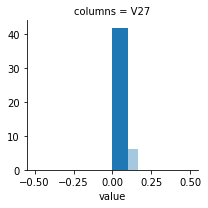

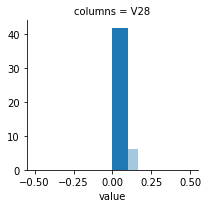

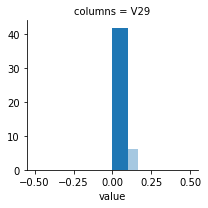

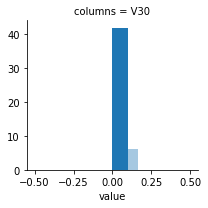

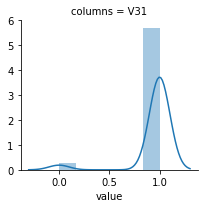

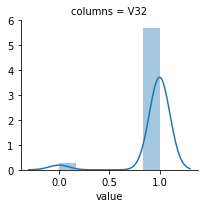

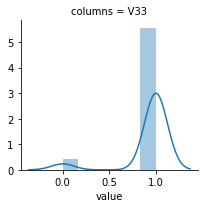

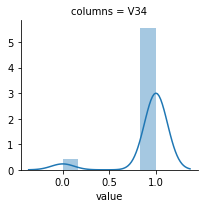

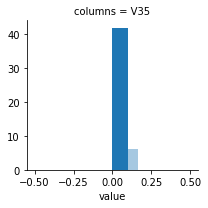

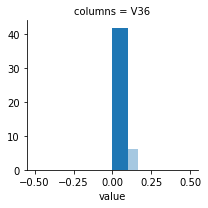

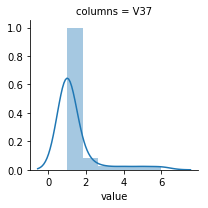

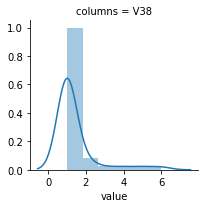

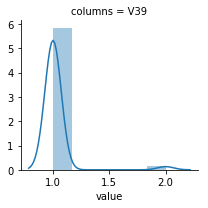

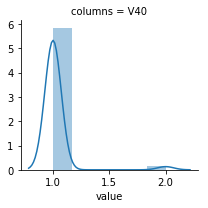

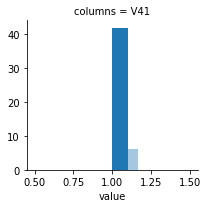

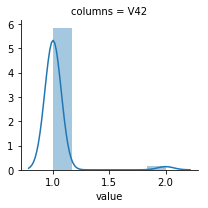

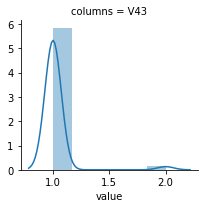

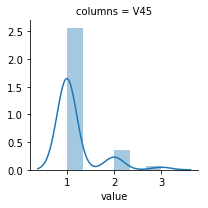

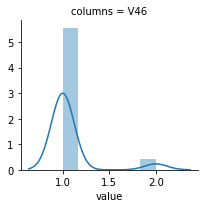

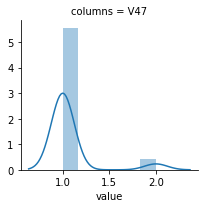

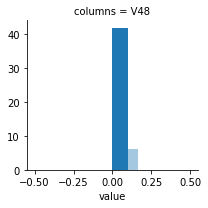

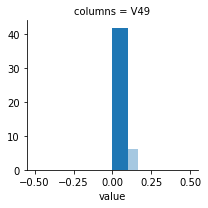

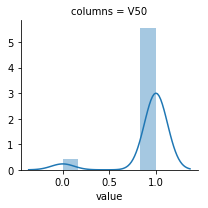

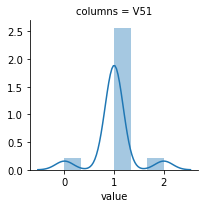

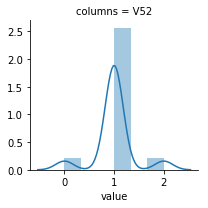

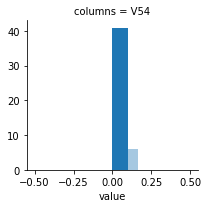

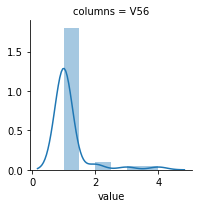

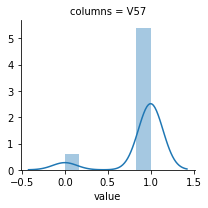

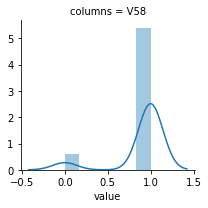

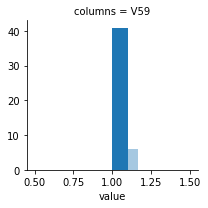

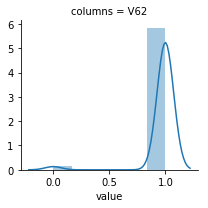

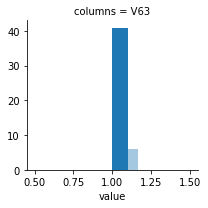

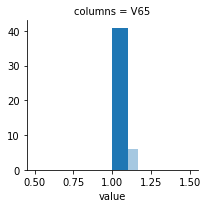

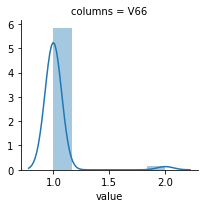

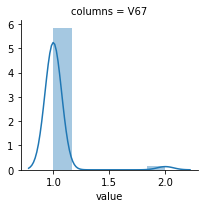

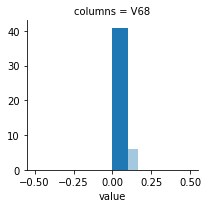

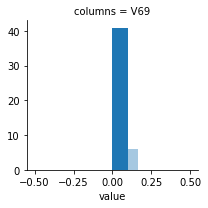

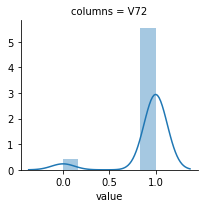

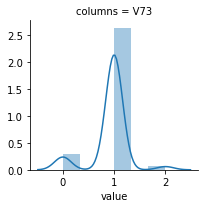

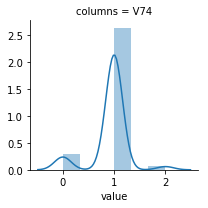

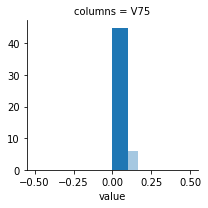

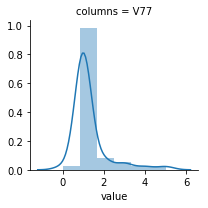

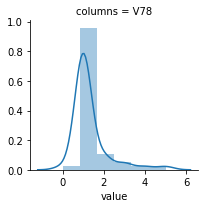

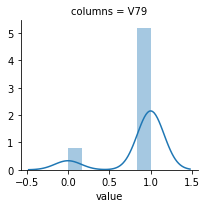

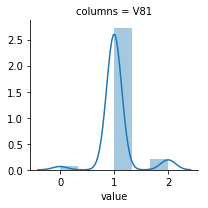

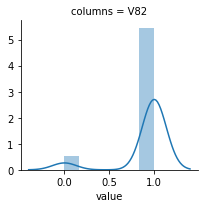

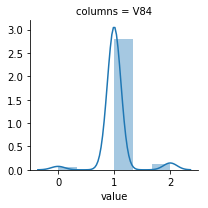

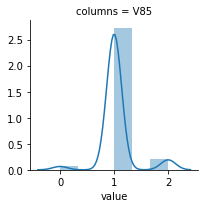

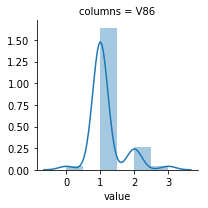

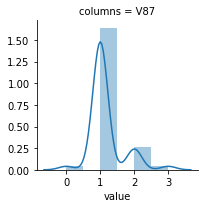

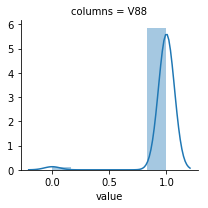

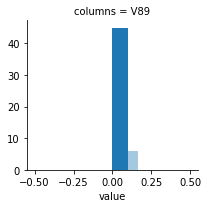

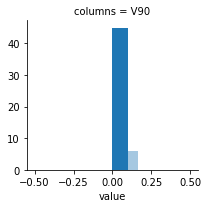

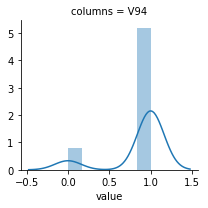

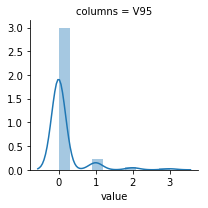

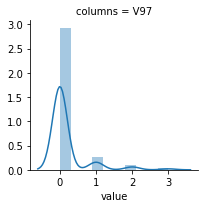

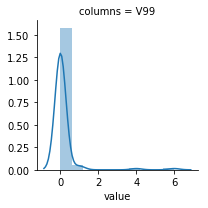

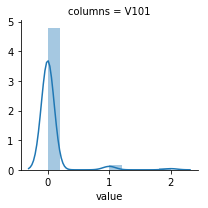

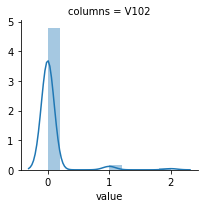

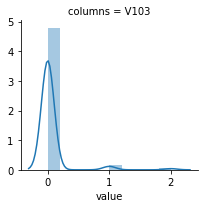

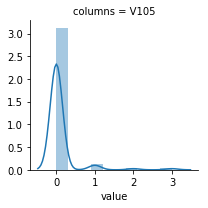

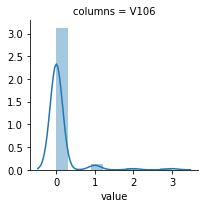

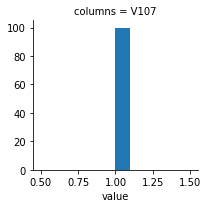

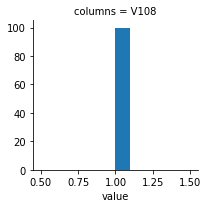

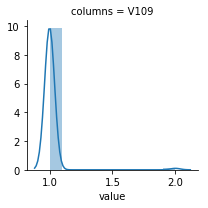

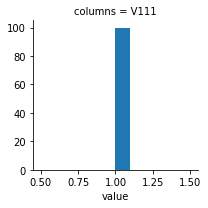

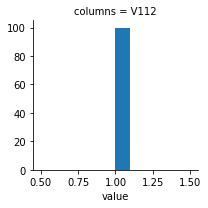

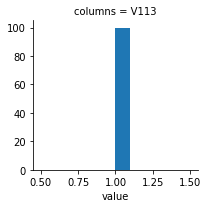

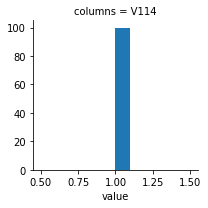

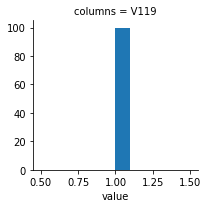

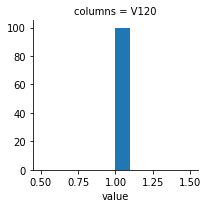

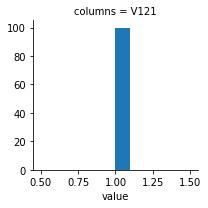

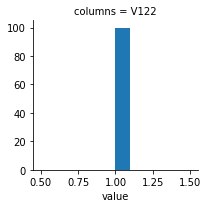

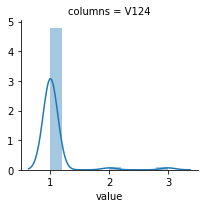

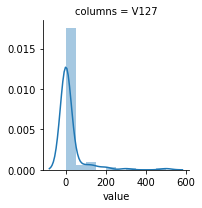

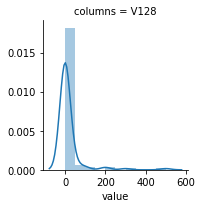

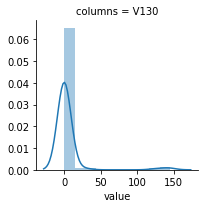

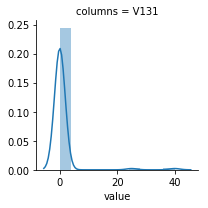

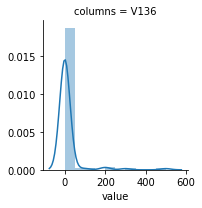

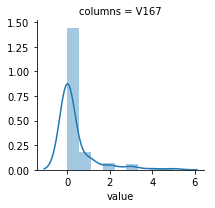

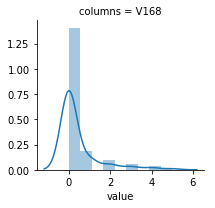

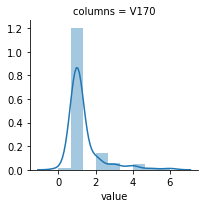

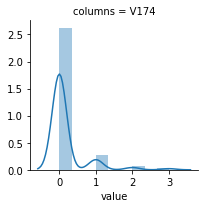

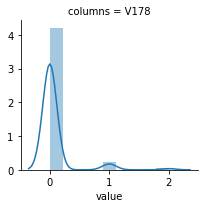

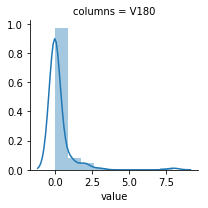

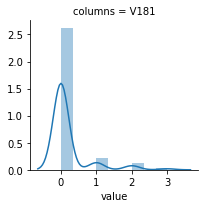

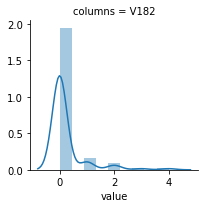

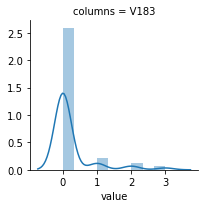

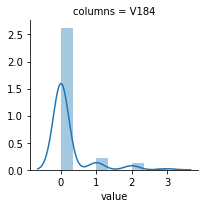

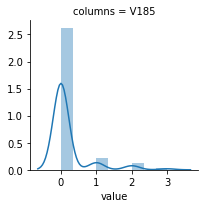

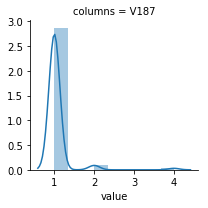

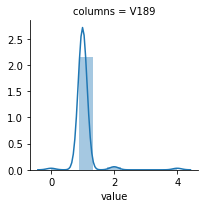

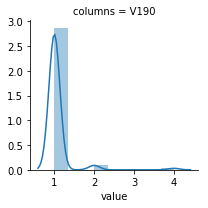

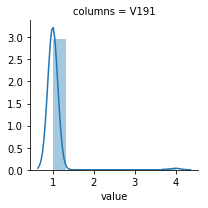

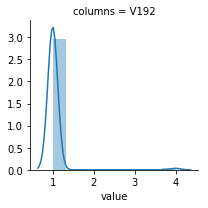

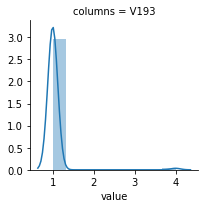

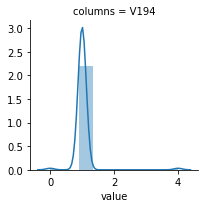

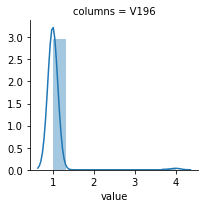

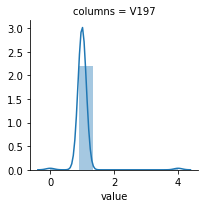

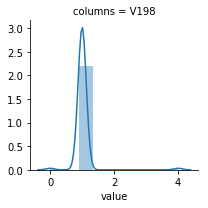

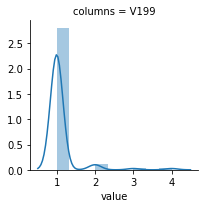

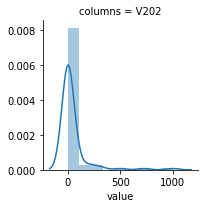

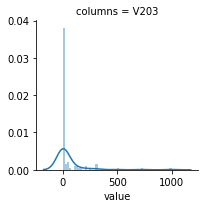

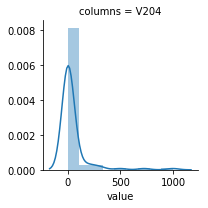

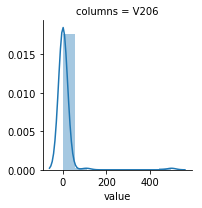

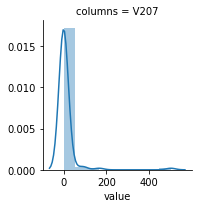

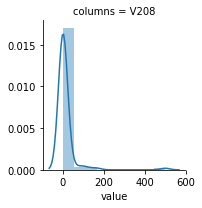

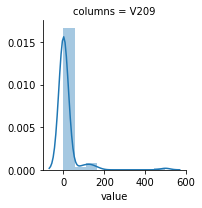

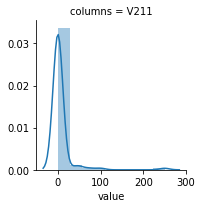

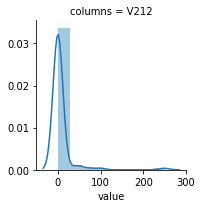

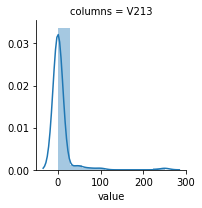

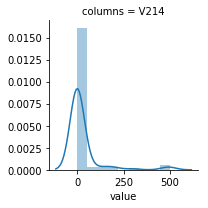

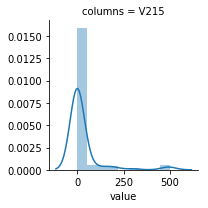

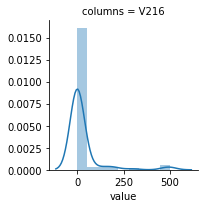

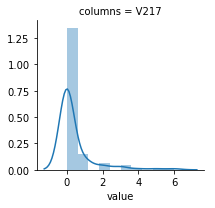

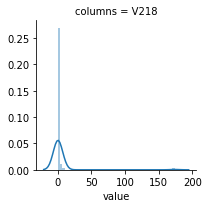

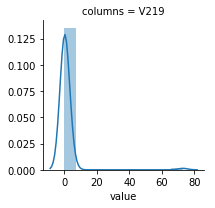

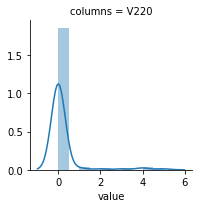

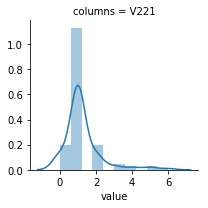

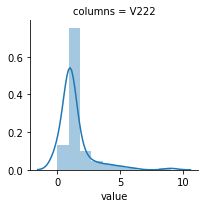

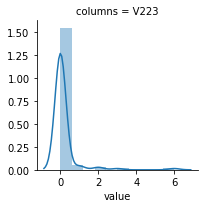

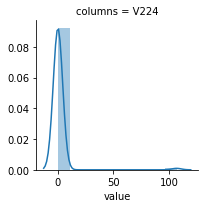

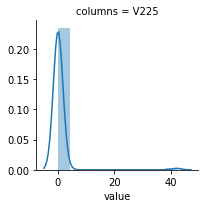

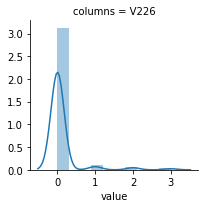

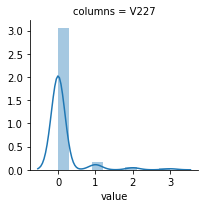

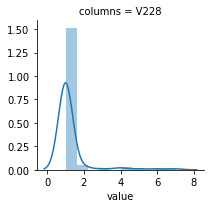

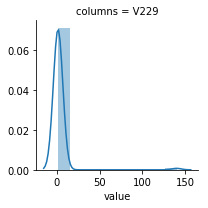

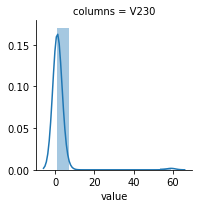

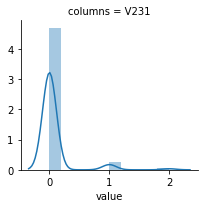

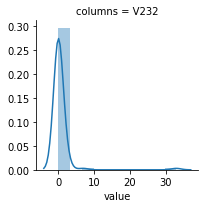

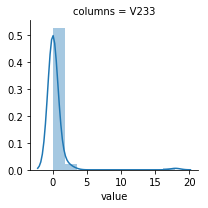

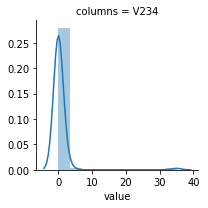

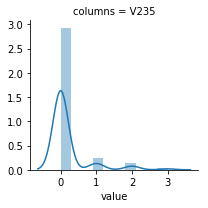

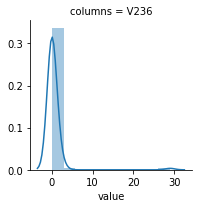

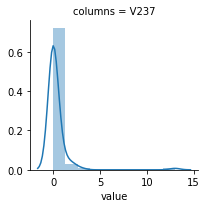

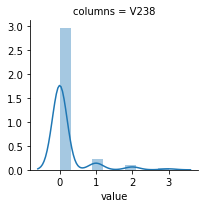

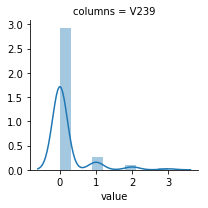

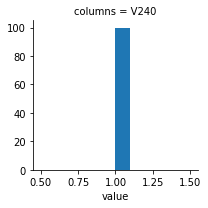

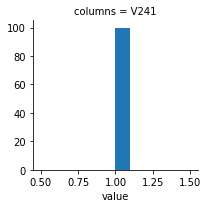

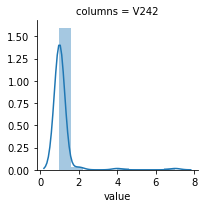

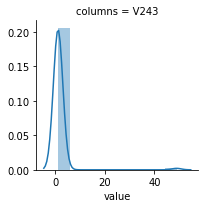

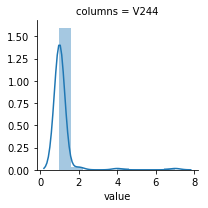

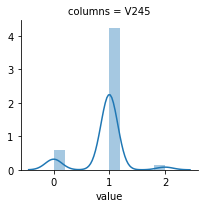

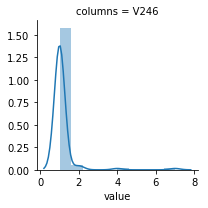

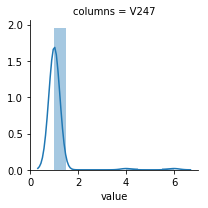

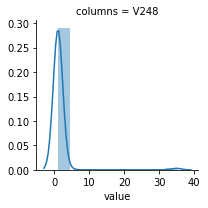

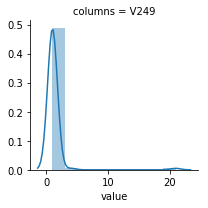

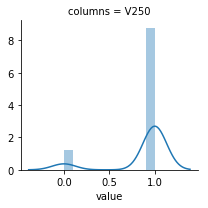

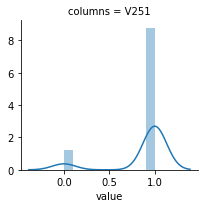

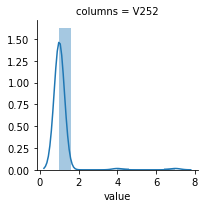

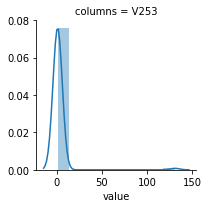

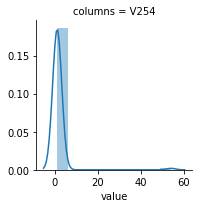

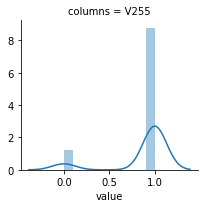

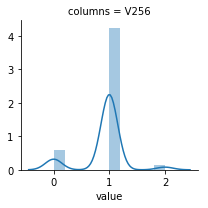

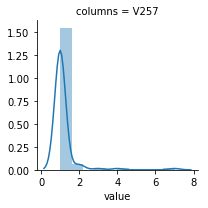

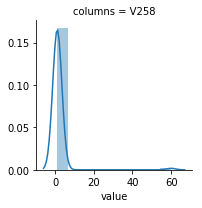

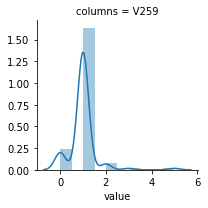

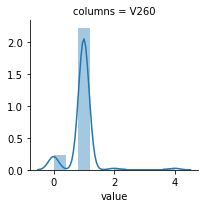

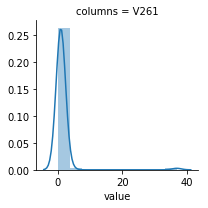

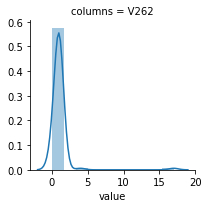

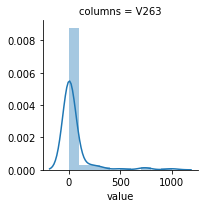

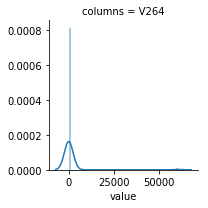

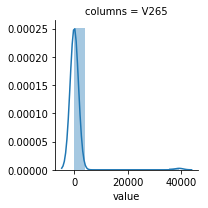

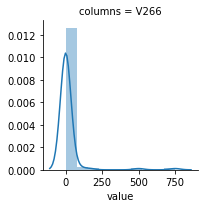

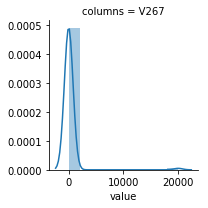

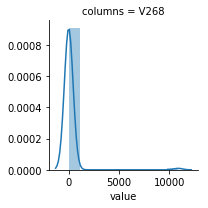

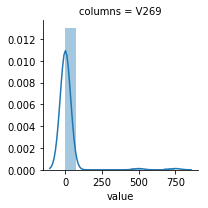

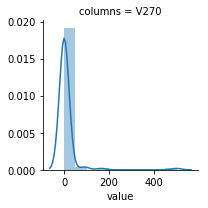

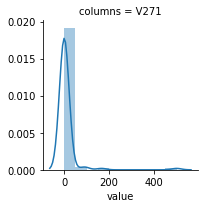

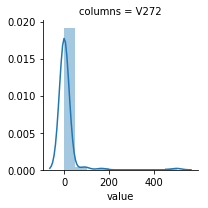

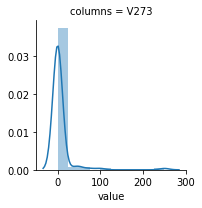

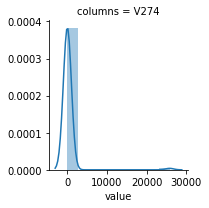

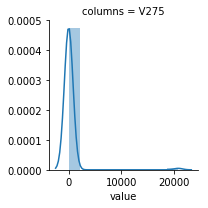

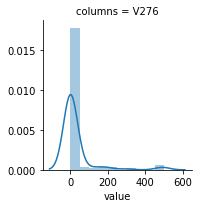

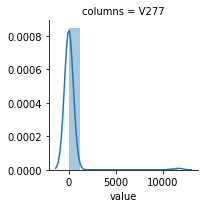

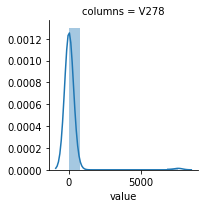

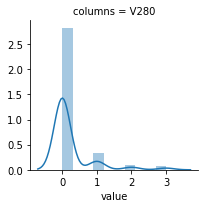

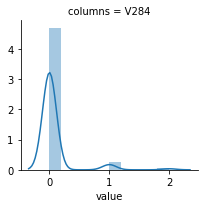

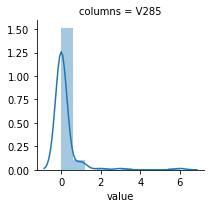

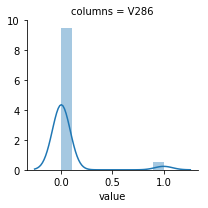

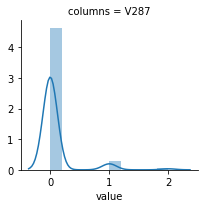

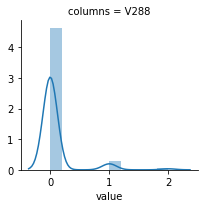

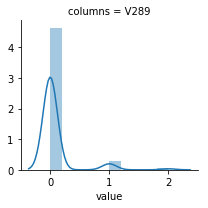

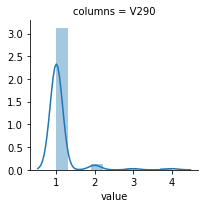

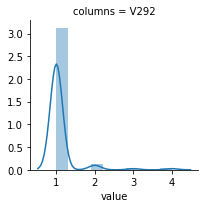

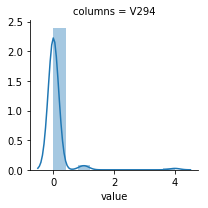

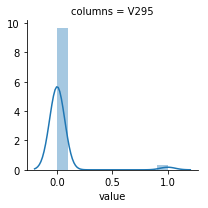

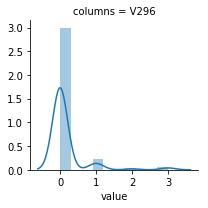

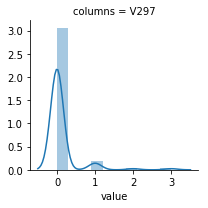

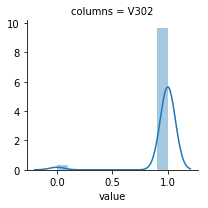

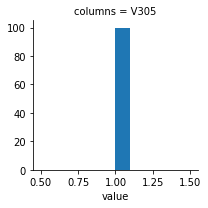

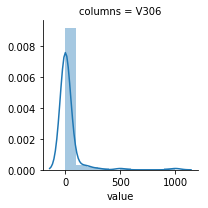

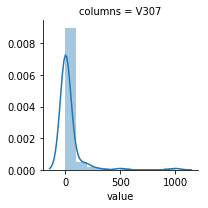

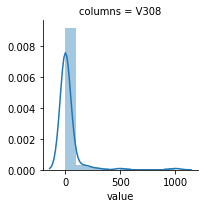

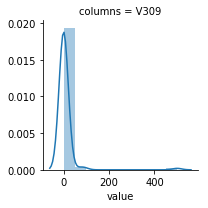

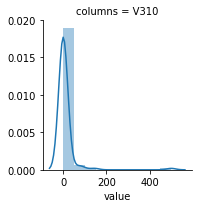

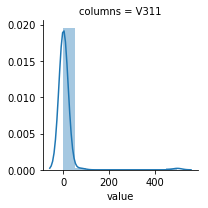

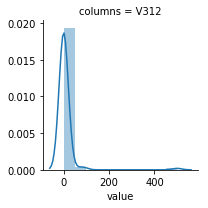

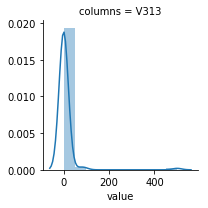

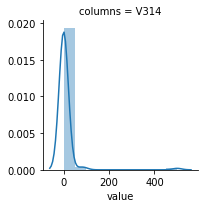

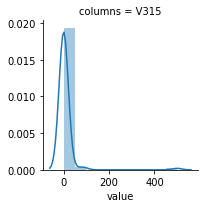

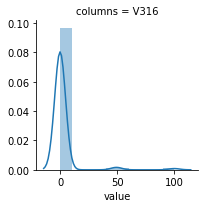

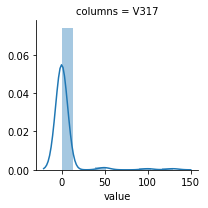

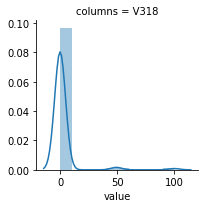

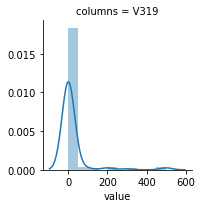

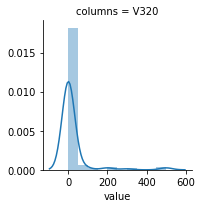

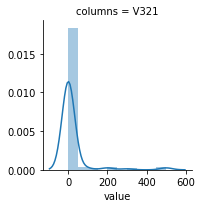

In [26]:
# check distribution
fig = plt.figure()

for idx, column_name in enumerate(list(df_clean.columns.values)):
    
    print ("\r[%-20s] %d%%" % ('='*int(idx/len(list(df_clean.columns.values)) * 20), int(idx/len(list(df_clean.columns.values)) * 100)), end='')
    
    dfm = df_clean.iloc[0:10, idx:idx+1].melt(var_name='columns')
    g = sns.FacetGrid(dfm, col='columns')
    try:
        g = g.map(sns.distplot, 'value')
    except:
        g = g.map(plt.hist, 'value')